# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

## ⚙️ Předzpracování dat

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pandas as pd
import numpy as np
import networkx as nx
import folium

import warnings
# for ignoring all warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

Načtení dat z CSV souborů

In [47]:
D = pd.read_csv('d.csv')
stops = pd.read_csv('stops.txt')

Základní přehled dat ze dvou datasetů

In [48]:
display(D.head())
display(stops.head())
display(D.info())
print('-' * 80)
display(stops.info())

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


,stop_id,stop_name,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,level_id,platform_code,asw_node_id,asw_stop_id
0,U50S1,Budějovická,50.044411,14.448787,P,NaN,1,NaN,1,NaN,NaN,50.0,NaN
1,U52S1,Chodov,50.031672,14.490961,P,NaN,1,NaN,1,NaN,NaN,52.0,NaN
2,U75S1,Kolbenova,50.110395,14.516398,P,NaN,1,NaN,1,NaN,NaN,75.0,NaN
3,U78S1,Ládví,50.126591,14.469451,P,NaN,1,NaN,1,NaN,NaN,78.0,NaN
4,U100S1,Vltavská,50.100298,14.438492,P,NaN,1,NaN,1,NaN,NaN,100.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


None

--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16435 entries, 0 to 16434
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              16435 non-null  object 
 1   stop_name            15936 non-null  object 
 2   stop_lat             16435 non-null  float64
 3   stop_lon             16435 non-null  float64
 4   zone_id              15408 non-null  object 
 5   stop_url             0 non-null      float64
 6   location_type        16435 non-null  int64  
 7   parent_station       954 non-null    object 
 8   wheelchair_boarding  16435 non-null  int64  
 9   level_id             954 non-null    object 
 10  platform_code        14750 non-null  object 
 11  asw_node_id          15748 non-null  float64
 12  asw_stop_id          15354 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.6+ M

None

Z úkolu víme, že přibližně 1.5 % záznamů má chybně nastavený čas. Nyní napíšeme vlastní funkci, kterou poté aplikujeme na každý záznam v atributech `depart_from` a `arrive_to`

In [49]:
# function that adjusts the hour values
def time(t):
    if pd.notnull(t):
        HH, MM, SS = map(int, str(t).split(':'))
        fixed_HH = HH % 24
        new_time = f"{fixed_HH:02d}:{MM:02d}:{SS:02d}"
        return new_time
    else: 
        return t
    
D["depart_from"] = D["depart_from"].apply(time)
D["arrive_to"] = D["arrive_to"].apply(time)

Nyní se můžeme ujistit, že maximální hodnota času v atributech odpovídá rozsahu s horní hranicí 24. To znamená, že žádný záznam by neměl obsahovat čas vyšší než 24 hodin

In [50]:
D["depart_from"] = pd.to_datetime(D["depart_from"], format='%H:%M:%S').dt.time
D["arrive_to"] = pd.to_datetime(D["arrive_to"], format='%H:%M:%S').dt.time
max_depart_time = D["depart_from"].max()
max_arrive_time = D["arrive_to"].max()
print(f"Maximální hodnota času u atributu 'depart_from': {max_depart_time}")
print(f"Maximální hodnota času u atributu 'arrive_to': {max_arrive_time}")

Maximální hodnota času u atributu 'depart_from': 23:59:50
Maximální hodnota času u atributu 'arrive_to': 23:59:55


## 🕸️ Základní síťová analýza

Pro zlepšení přehlednosti budoucích vizualizací se zaměříme pouze na tramvajové zastávky a spoje. Pomocí balíčku `networkx` sestavíme orientovaný graf, který bude mít tramvajové zastávky jako vrcholy. Mezi dvěma zastávkami bude orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky tramvajového spoje.

In [51]:
G = nx.DiGraph()

In [52]:
stop_pos = {}

In [53]:
for i, row in stops.iterrows():
    stop_pos[row["stop_name"]] = np.array([row["stop_lon"], row["stop_lat"]])
    G.add_node(row["stop_name"])
for i, row in D.iterrows():
    if row["route_type"] == 0:
        weight = D.iloc[i, 8:].sum()
        if G.has_edge(row["stop_from_name"], row["stop_to_name"]):
            G[row["stop_from_name"]][row["stop_to_name"]]["weight"] += weight
        else:
            G.add_edge(row["stop_from_name"], row["stop_to_name"], weight=weight)

In [54]:
# leave only tram stops in the graph
isolated_stops = list(nx.isolates(G))
G.remove_nodes_from(isolated_stops)

Vykreslíme vizualizaci našeho grafu s využitím reálných souřadnic zastávek

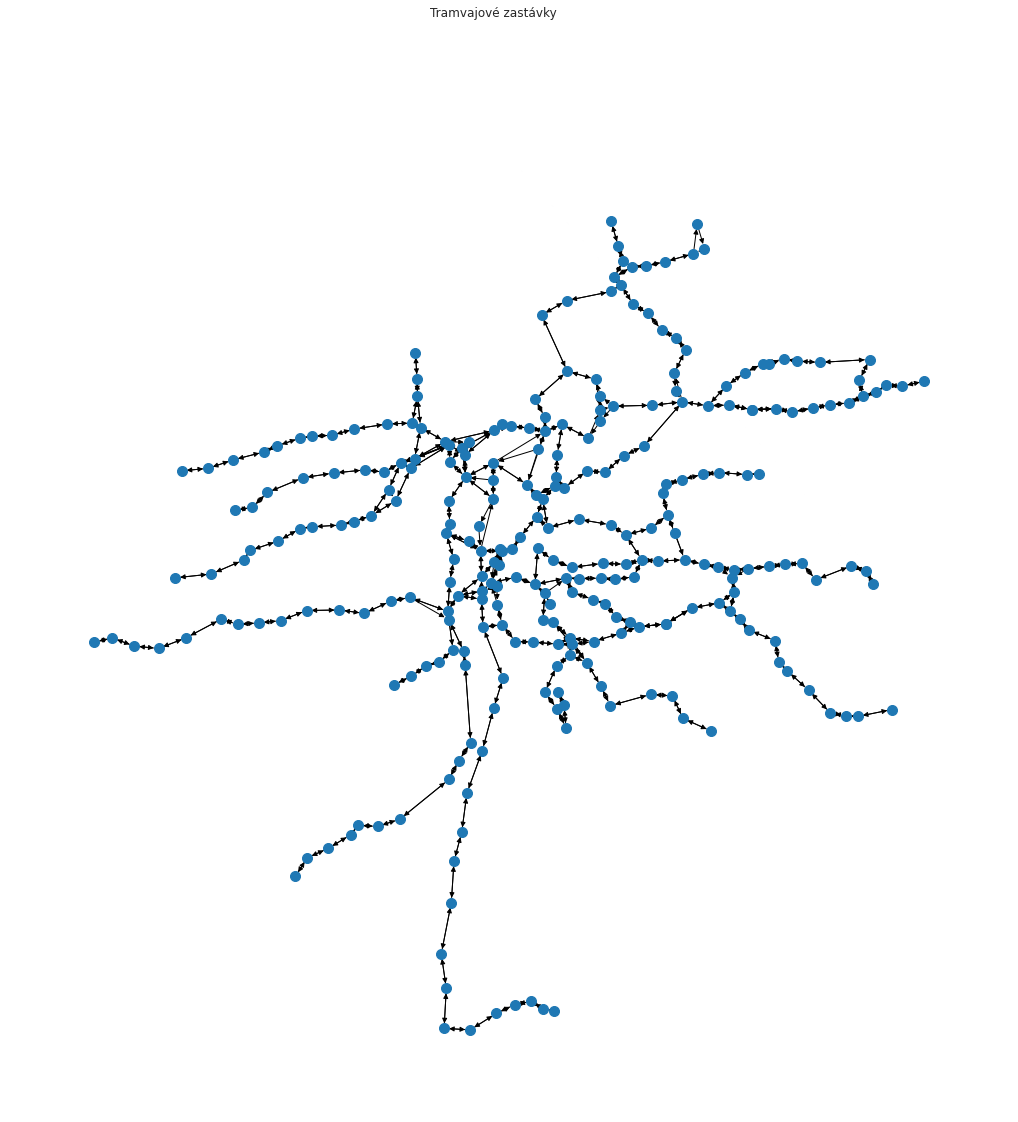

In [55]:
fig, ax = plt.subplots(figsize=(18, 18))
nx.draw(G, pos=stop_pos, with_labels=False, node_size=100)
fig.suptitle("Tramvajové zastávky")
plt.show()

Vzhledem k tomu, že počet tramvajových zastávek je poměrně velký a umístění názvů zastávek vedle grafu by vedlo k nepřehlednosti, vytvoříme interaktivní vizualizaci s využitím balíčku `folium`. Tato vizualizace bude uložena ve stejném adresáři v souboru `tram_stops_interactive.html`. Poskytuje možnost přehledu reálné polohy každé zastávky na pražské mapě, kde můžete získat informace o názvech jednotlivých zastávek.

In [56]:
m1 = folium.Map(location=[50.0755, 14.4378], zoom_start=12)

for node in G.nodes():
    stop_name = node
    coords = [stop_pos[node][1], stop_pos[node][0]]
    marker = folium.CircleMarker(location=coords, radius=5, popup=folium.Popup(stop_name), color='blue', fill=True, fill_color='blue')
    marker.add_to(m1)

for edge in G.edges():
    coords1 = [stop_pos[edge[0]][1], stop_pos[edge[0]][0]]
    coords2 = [stop_pos[edge[1]][1], stop_pos[edge[1]][0]]
    folium.PolyLine([coords1, coords2], color='black').add_to(m1)

m1.save('tram_stops_interactive.html')

In [57]:
print(f'Celkový počet hran: {G.number_of_edges()}')
print(f'Celkový počet vrcholů: {G.number_of_nodes()}')

Celkový počet hran: 661
Celkový počet vrcholů: 281


In [58]:
for edge in G.edges(data=True):
    print(f"Hrana: {edge[0]} -> {edge[1]}, Váha: {edge[2]['weight']}")

Hrana: Kolbenova -> Nový Hloubětín, Váha: 917
Hrana: Kolbenova -> Poštovská, Váha: 907
Hrana: Ládví -> Štěpničná, Váha: 1833
Hrana: Ládví -> Kyselova, Váha: 1907
Hrana: Vltavská -> Pražská tržnice, Váha: 5470
Hrana: Vltavská -> Strossmayerovo náměstí, Váha: 4563
Hrana: Vltavská -> Štvanice, Váha: 788
Hrana: Nádraží Holešovice -> Výstaviště, Váha: 3586
Hrana: Nádraží Holešovice -> Trojská, Váha: 1168
Hrana: Nádraží Holešovice -> Ortenovo náměstí, Váha: 2689
Hrana: Flora -> Olšanské hřbitovy, Váha: 5518
Hrana: Flora -> Orionka, Váha: 2637
Hrana: Flora -> Radhošťská, Váha: 1399
Hrana: Flora -> Olšanské náměstí, Váha: 1462
Hrana: Hloubětín -> Sídliště Hloubětín, Váha: 3223
Hrana: Hloubětín -> Kbelská, Váha: 2894
Hrana: Hlavní nádraží -> Masarykovo nádraží, Váha: 3098
Hrana: Hlavní nádraží -> Viktoria Žižkov, Váha: 7787
Hrana: Hlavní nádraží -> Jindřišská, Váha: 4597
Hrana: Bořislavka -> Na Pískách, Váha: 4381
Hrana: Bořislavka -> Sídliště Červený Vrch, Váha: 4270
Hrana: Hradčanská -> Chotk

### Degree Centrality

In [59]:
dc = nx.degree_centrality(G)
degree_centrality = pd.DataFrame(list(dc.items()), columns=['Node', 'Degree Centrality'])
degree_centrality.sort_values(by='Degree Centrality', ascending=False, inplace=True)
print("Trojice s největší hodnotou dané centrality")
display(degree_centrality.head(3))

Trojice s největší hodnotou dané centrality


,Node,Degree Centrality
13,Malostranská,0.046429
151,Otakarova,0.042857
150,Náměstí Bratří Synků,0.042857



Zastávky s vysokým ukazatelem Degree Centrality, například **Malostranská, Otakarova a Náměstí Bratří Synků**, jsou považovány za velmi důležité v síti tramvajových zastávek. Tyto zastávky mají mnoho přímých spojení s ostatními zastávkami, což znamená, že jsou klíčovými uzly v tramvajové síti. Čím vyšší je Degree Centrality u zastávky, tím více dopravních spojení a přestupních možností poskytuje. Pravděpodobně se tato místa nacházejí na křižovatkách populárních tras a jsou strategicky důležitá pro efektivní pohyb cestujících po městě.

In [60]:
print("Trojice s nejmenší hodnotou dané centrality")
degree_centrality.tail(3)

Trojice s nejmenší hodnotou dané centrality


,Node,Degree Centrality
66,Nádraží Podbaba,0.007143
41,Bílá Hora,0.007143
253,Levského,0.003571



Zastávky s nízkým ukazatelem Degree Centrality, například **Nádraží Podbaba, Bílá Hora a Levského**, jsou považovány za méně důležité v síti tramvajových zastávek. Tyto zastávky mají méně přímých spojení s ostatními zastávkami, což znamená, že nejsou klíčovými uzly v tramvajové síti. Pravděpodobně se tyto místa nacházejí na méně frekventovaných trasách a mají nižší dopravní význam.

### Closeness Centrality

In [61]:
cc = nx.closeness_centrality(G)
closeness_centrality = pd.DataFrame(list(cc.items()), columns=['Node', 'Closeness Centrality'])
closeness_centrality.sort_values(by='Closeness Centrality', ascending=False, inplace=True)
print("Trojice s největší hodnotou dané centrality")
display(closeness_centrality.head(3))

Trojice s největší hodnotou dané centrality


,Node,Closeness Centrality
13,Malostranská,0.096253
28,Staroměstská,0.095433
52,Čechův most,0.094883


Zastávky s vysokým ukazatelem Closeness Centrality, například **Malostranská, Staroměstská a Čechův most**, jsou velmi dobře dostupné z většiny ostatních zastávek v tramvajové síti. To znamená, že se na tyto zastávky rychle a snadno dostanete z jakéhokoli místa ve městě. Pravděpodobně jsou tyto zastávky umístěny blízko centra nebo mají mnoho spojení s dalšími důležitými zastávkami. Vysoký ukazatel Closeness Centrality naznačuje efektivnost spojení a dostupnost těchto míst v tramvajové síti města.

In [62]:
print("Trojice s nejmenší hodnotou dané centrality")
closeness_centrality.tail(3)

Trojice s nejmenší hodnotou dané centrality


,Node,Closeness Centrality
254,Sídliště Modřany,0.038706
138,Nádraží Hostivař,0.037961
253,Levského,0.000000


Zastávky s nízkým ukazatelem Closeness Centrality, například **Sídliště Modřany, Nádraží Hostivař a Levského**, jsou méně dobře dostupné z většiny ostatních zastávek v tramvajové síti. To znamená, že se na tyto zastávky může dostat pomaleji nebo obtížněji ze vzdálenějších částí města. Pravděpodobně jsou tyto zastávky umístěny mimo centrum nebo mají omezenější spojení s ostatními důležitými zastávkami. Nízký ukazatel Closeness Centrality naznačuje, že tyto zastávky mohou být méně efektivní v rámci tramvajové sítě města.

### Betweenness Centrality

In [63]:
bc = nx.betweenness_centrality(G)
betweenness_centrality = pd.DataFrame(list(bc.items()), columns=['Node', 'Betweenness Centrality'])
betweenness_centrality.sort_values(by='Betweenness Centrality', ascending=False, inplace=True)
print("Trojice s největší hodnotou dané centrality")
display(betweenness_centrality.head(3))

Trojice s největší hodnotou dané centrality


,Node,Betweenness Centrality
13,Malostranská,0.341121
152,Národní divadlo,0.280907
52,Čechův most,0.270975


Zastávky s vysokým ukazatelem Betweenness Centrality, například **Malostranská, Národní divadlo a Čechův most**, jsou jako klíčové uzly v tramvajové síti. To znamená, že tyto zastávky často leží na nejkratších cestách mezi jinými zastávkami. Jsou to místa, která lidé často používají pro přestupy nebo cesty mezi různými tramvajovými trasami. Vysoký Betweenness Centrality ukazuje na to, že tyto zastávky hrají důležitou roli při udržování efektivního spojení v síti.

In [64]:
print("Trojice s nejmenší hodnotou dané centrality")
betweenness_centrality.tail(3)

Trojice s nejmenší hodnotou dané centrality


,Node,Betweenness Centrality
204,Spojovací,0.0
205,Spořilov,0.0
280,Střelecký ostrov,0.0


Zastávky s nízkým ukazatelem Betweenness Centrality, například **Spojovací, Spořilov a Střelecký ostrov**, jsou méně klíčové pro přímé spojení mezi ostatními zastávkami. To znamená, že tato místa jsou pravděpodobně na okraji sítě nebo jsou méně využívána pro přestupy. Nízký Betweenness Centrality naznačuje, že tyto zastávky jsou méně důležité pro udržení hlavních spojení v tramvajové síti.

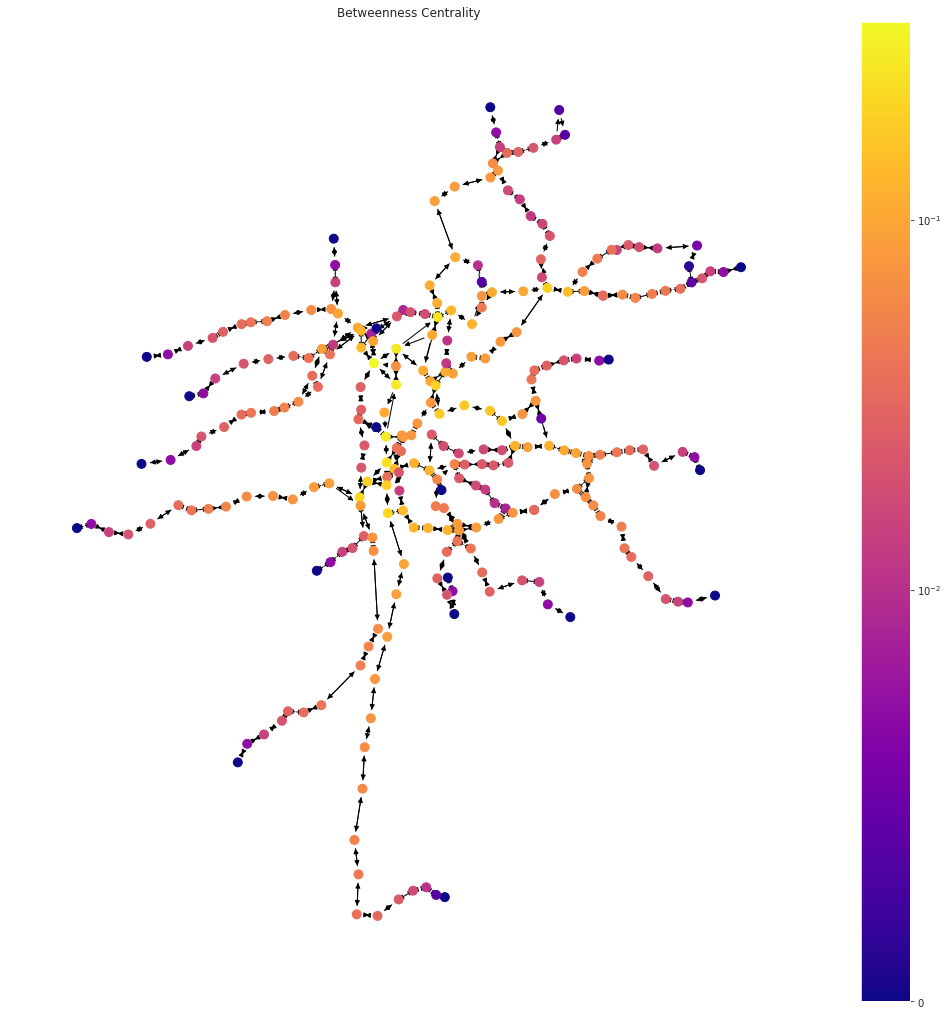

In [65]:
fig, ax = plt.subplots(figsize=(18, 18))
nodes = nx.draw_networkx_nodes(G, pos=stop_pos, cmap=plt.cm.plasma, node_size=80, node_color=list(bc.values()), nodelist=bc.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
edges = nx.draw_networkx_edges(G, pos=stop_pos)

plt.title("Betweenness Centrality")
plt.colorbar(nodes)
plt.axis('off')
plt.show()

## ❓ Vlastní otázky

Moje otázky se budou týkat nočního provozu tramvajových zastávek a spojů, takže odfiltrujeme původní dataset podle koncepce (v novém datasetu `night_D` budou pouze noční spoje)

In [66]:
night_D = D[(D["is_night"] == 1) & (D["route_type"] == 0)]
tram_D = D[(D["route_type"] == 0)]

In [67]:
night_D

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
1514711,U529Z5P,Palmovka,U471Z2P,Libeňský zámek,00:25:00,00:27:00,0,1,1,1,1,1,1,1,1
1514712,U471Z2P,Libeňský zámek,U779Z2P,U Kříže,00:27:00,00:28:00,0,1,1,1,1,1,1,1,1
1514713,U779Z2P,U Kříže,U861Z2P,Vosmíkových,00:28:00,00:29:00,0,1,1,1,1,1,1,1,1
1514714,U861Z2P,Vosmíkových,U54Z2P,Bulovka,00:29:00,00:31:00,0,1,1,1,1,1,1,1,1
1514715,U54Z2P,Bulovka,U870Z2P,Vychovatelna,00:31:00,00:32:00,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593397,U394Z2P,Motol,U395Z2P,Krematorium Motol,04:37:00,04:38:00,0,1,1,1,1,1,1,0,0
1593398,U395Z2P,Krematorium Motol,U113Z2P,Hlušičkova,04:38:00,04:39:00,0,1,1,1,1,1,1,0,0
1593399,U113Z2P,Hlušičkova,U236Z2P,Slánská,04:39:00,04:41:00,0,1,1,1,1,1,1,0,0
1593400,U236Z2P,Slánská,U47Z2P,Blatiny,04:41:00,04:42:00,0,1,1,1,1,1,1,0,0


### 1. Jak se mění síť tramvajových zastávek a spojů v noci?

Pomocí vhodné vizualizace sítě ukážeme, jakými zastávkami noční tramvaje nejezdí. Vyhledané izolované zastávky na vizualizaci jsou červeně označeny (grafové uzly, které nejsou s nikým spojeny hranou)

In [68]:
all_stops = set(list(tram_D["stop_from_name"]))
night_stops = set(list(night_D["stop_from_name"]))
night_stops.add("Levského")
isolated_stops = all_stops - night_stops

new_stops = stops[stops["stop_name"].isin(night_stops)]

In [69]:
night_G = nx.DiGraph()

for i, row in new_stops.iterrows():
    night_G.add_node(row["stop_name"])
for i, row in night_D.iterrows():
    weight = D.iloc[i, 8:].sum()
    if night_G.has_edge(row["stop_from_name"], row["stop_to_name"]):
        night_G[row["stop_from_name"]][row["stop_to_name"]]["weight"] += weight
    else:
        night_G.add_edge(row["stop_from_name"], row["stop_to_name"], weight=weight)

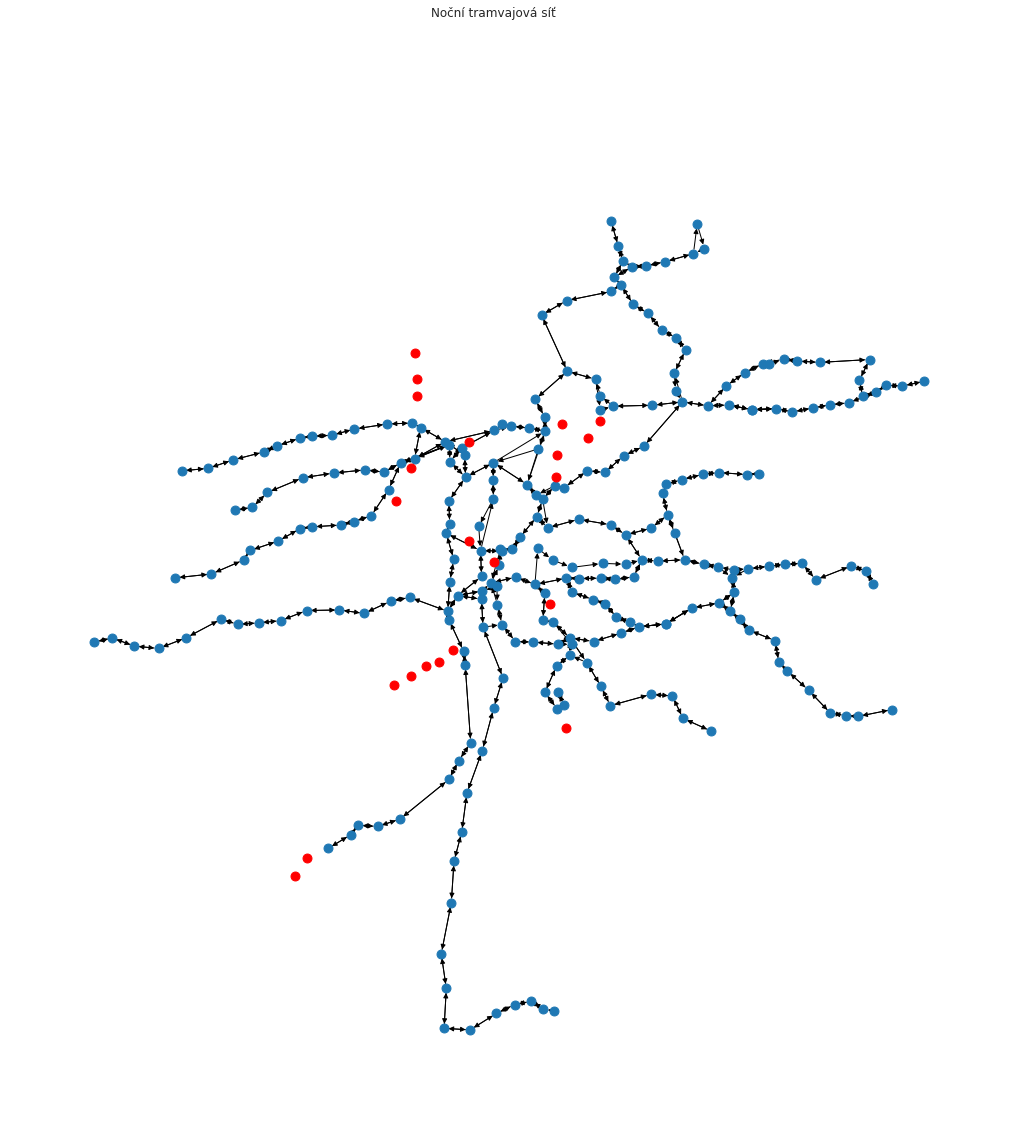

In [70]:
fig, ax = plt.subplots(figsize=(18, 18))
nx.draw(night_G, pos=stop_pos, with_labels=False, node_size=80)
nx.draw_networkx_nodes(isolated_stops, pos=stop_pos, node_color='red', node_size=80)
fig.suptitle("Noční tramvajová síť")
plt.show()

* V důsledku toho lze pozorovat, že většina zastávek je zapojena do nočního provozu. Co zase vypovídá o dobré organizaci veřejné dopravy ve městě v noci.
* Názvy izolovaných zastávek si můžete prohlédnout v interaktivní vizualizaci, která je uložena ve stejném adresáři v souboru `isolated_stops_at_night.html`

In [71]:
m2 = folium.Map(location=[50.0755, 14.4378], zoom_start=12)

for stop in isolated_stops:
    coords = [stop_pos[stop][1], stop_pos[stop][0]]
    marker = folium.CircleMarker(location=coords, radius=5, popup=folium.Popup(stop), color='red', fill=True, fill_color='red')
    marker.add_to(m2)

m2.save('isolated_stops_at_night.html')

### 2. Pokaždé na konci semestru s blížícím se obdobím zkoušek se často setkávám se situací, kdy se musím v pozdních odpoledních hodinách vrátit z NTK domů (Dejvická -> Invalidovna). Je možné se v noci dostat domů tramvají? Pokud ano, jaká je nejkratší trať, pokud jde o počet zastávek?

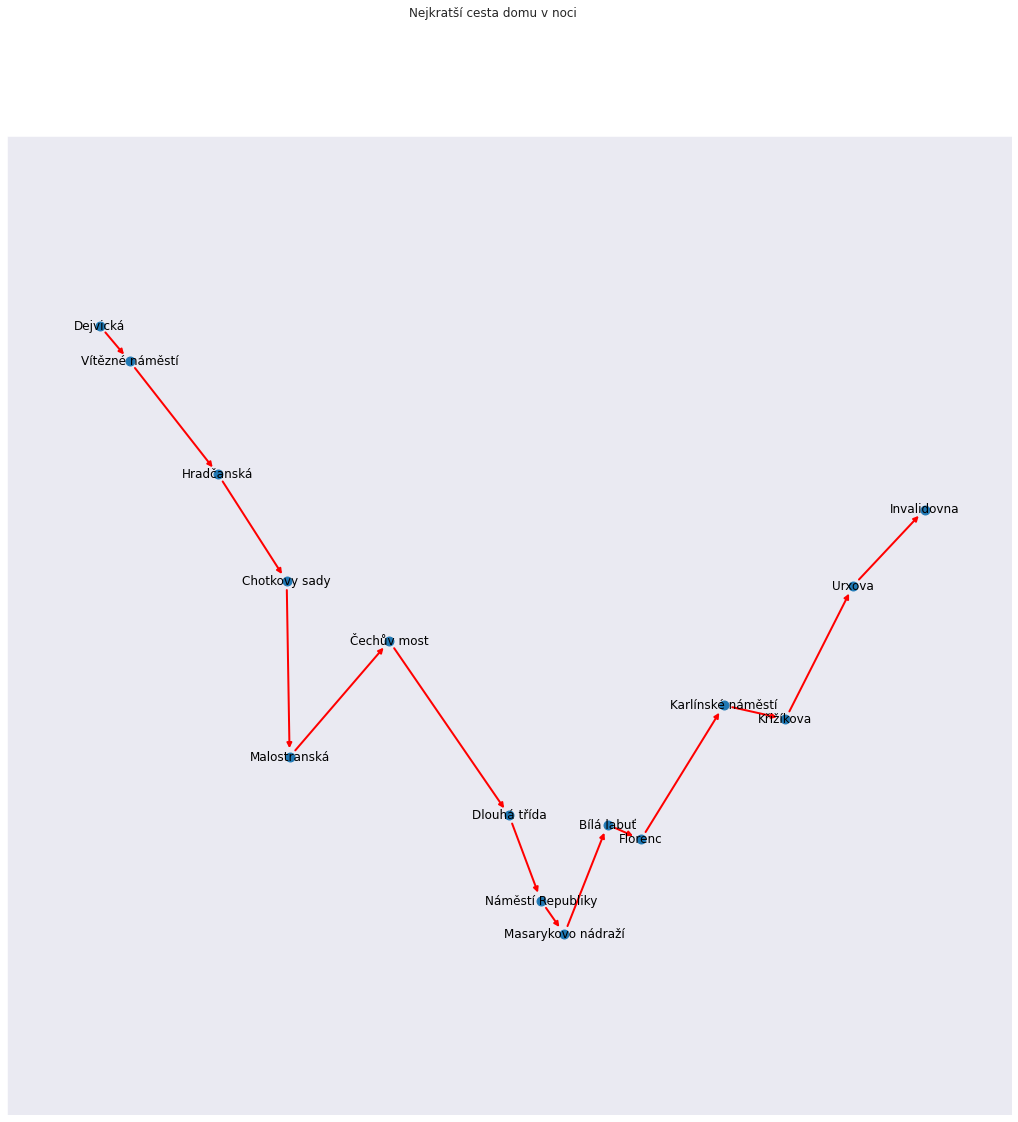

In [72]:
shortest_path_home = nx.shortest_path(night_G, source='Dejvická', target='Invalidovna')

shortest_path_G = night_G.subgraph(shortest_path_home)

fig, ax = plt.subplots(figsize=(18, 18))
nx.draw_networkx_nodes(shortest_path_G, pos=stop_pos, node_size=80)
nx.draw_networkx_labels(G, pos=stop_pos, labels={node: node for node in shortest_path_home})
nx.draw_networkx_edges(shortest_path_G, pos=stop_pos, edgelist=[(shortest_path_home[i], shortest_path_home[i + 1]) for i in range(len(shortest_path_home) - 1)], edge_color='red', width=2)
fig.suptitle("Nejkratší cesta domu v noci")
plt.grid(False)
plt.show()

Odpověď na tuto otázku ano a tato vizualizace ukazuje jednu z nejkratších cest.

### 3. Jak moc se liší význam každé zastávky v noci v souladu s hodnotou Betweeness Centrality?

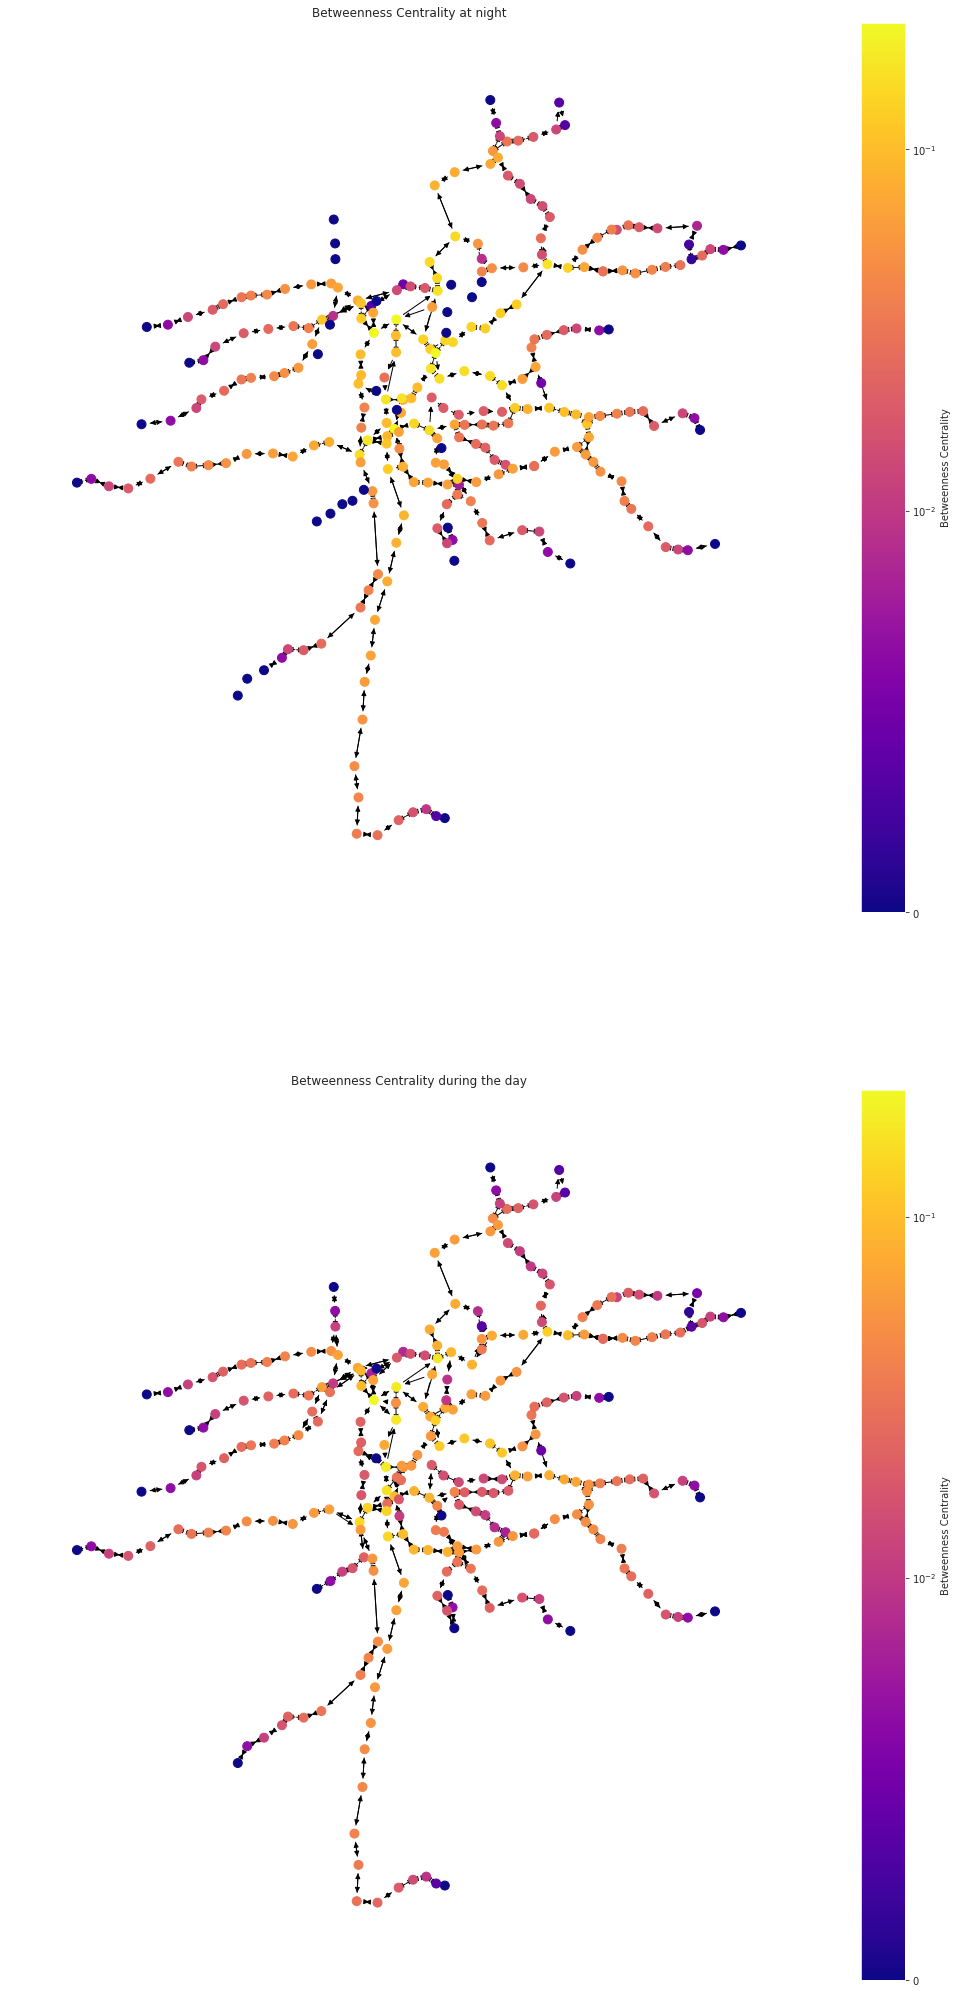

In [73]:
for stop in isolated_stops:
    night_G.add_node(stop)

night_bc = nx.betweenness_centrality(night_G)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 36))

nodes1 = nx.draw_networkx_nodes(night_G, pos=stop_pos, cmap=plt.cm.plasma, node_size=80, node_color=list(night_bc.values()), nodelist=night_bc.keys(), ax=ax[0])
nodes1.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
edges1 = nx.draw_networkx_edges(night_G, pos=stop_pos, ax=ax[0])
ax[0].set_title("Betweenness Centrality at night")
cbar1 = plt.colorbar(nodes1, ax=ax[0])
cbar1.set_label('Betweenness Centrality')
ax[0].axis('off')

nodes2 = nx.draw_networkx_nodes(G, pos=stop_pos, cmap=plt.cm.plasma, node_size=80, node_color=list(bc.values()), nodelist=bc.keys(), ax=ax[1])
nodes2.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
edges2 = nx.draw_networkx_edges(G, pos=stop_pos, ax=ax[1])
ax[1].set_title("Betweenness Centrality during the day")
cbar2 = plt.colorbar(nodes1, ax=ax[1])
cbar2.set_label('Betweenness Centrality')
ax[1].axis('off')

plt.show()

Na základě této vizualizace lze dospět k závěru, že hodnota ukazatele Betweeness Centrality u zastávek, které nejsou zapojeny do nočního provozu tramvají, klesla na hodnotu 0. Důvodem je, že přes tyto zastávky nevede žádná cesta spojující další dvě zastávky. U ostatních zastávek je hodnota buď stejná, nebo se mírně změnila. To znamená, že význam každé zastávky se globálně nezměnil.